In [2]:
import os
import glob
import json

import cv2
import pandas as pd 
from pycocotools.coco import COCO
from PIL import Image
import numpy as np 
import skimage.io as io
from matplotlib import pyplot as plt
from pprint import pprint
%matplotlib inline

In [3]:
with open('annotations.json', 'r', encoding='utf8') as file:
    data = json.load(file)

In [4]:
data.keys()

dict_keys(['licenses', 'info', 'categories', 'images', 'annotations'])

In [5]:
print(len(data['images']))
# Let's print out the first few image filenames/paths
for img in data['images'][:10]:
    print(img['file_name'])


8729
images/t001/CAluWEgwPX.JPG
images/t001/EKyrFKHQzh.JPG
images/t001/ELAvEqeXxT.JPG
images/t001/IxRLFwTGCv.JPG
images/t001/LKCJAhfLBJ.JPG
images/t001/LZystXlIqe.JPG
images/t001/OiaMESWPyh.JPG
images/t001/VMyJozldvy.jpg
images/t001/XhbkFIOvZr.JPG
images/t001/ZKnMahXQgJ.JPG


In [6]:
# Let's see first annotation
for ann in data['annotations'][:1]:
    for key, value in ann.items():
        print(key)
        print(value)
        print("********")
    print("--------------------------------")

id
1
********
image_id
1
********
category_id
3
********
segmentation
{'counts': [858927, 7, 1322, 23, 1306, 34, 1298, 36, 1296, 39, 1292, 42, 1291, 43, 1289, 45, 1287, 47, 1285, 48, 1285, 49, 1283, 51, 1281, 53, 1280, 54, 1278, 56, 1277, 56, 1277, 57, 1275, 58, 1274, 60, 1273, 61, 1272, 61, 1272, 62, 1270, 63, 1269, 64, 1268, 65, 1268, 65, 1268, 66, 1267, 67, 1266, 67, 1265, 68, 1264, 69, 1263, 70, 1263, 70, 1263, 70, 1263, 70, 1263, 70, 1263, 70, 1262, 71, 1261, 72, 1261, 72, 1261, 72, 1261, 72, 1261, 72, 1261, 72, 1261, 72, 1260, 73, 1260, 73, 1260, 73, 1259, 74, 1258, 75, 1258, 74, 1259, 73, 1260, 72, 1261, 71, 1262, 69, 1263, 69, 1264, 68, 1265, 66, 1266, 64, 1269, 63, 1269, 61, 1272, 59, 1274, 58, 1275, 55, 1278, 52, 1281, 15, 8, 25, 1285, 12, 16, 17, 1289, 9, 24, 3, 1297, 7, 1327, 4, 1715124], 'size': [1333, 2000]}
********
area
4065.0
********
bbox
[644.0, 441.0, 70.0, 78.0]
********
iscrowd
1
********
attributes
{'orientation': 'left', 'occluded': False}
********
-------------

In [7]:
# initialise COCO API for annotations
coco = COCO('annotations.json')

loading annotations into memory...
Done (t=2.40s)
creating index...
index created!


In [8]:
for key in coco.anns.keys():
    pprint(coco.anns[key])
    break 

{'area': 4065.0,
 'attributes': {'occluded': False, 'orientation': 'left'},
 'bbox': [644.0, 441.0, 70.0, 78.0],
 'category_id': 3,
 'id': 1,
 'image_id': 1,
 'iscrowd': 1,
 'segmentation': {'counts': [858927,
                             7,
                             1322,
                             23,
                             1306,
                             34,
                             1298,
                             36,
                             1296,
                             39,
                             1292,
                             42,
                             1291,
                             43,
                             1289,
                             45,
                             1287,
                             47,
                             1285,
                             48,
                             1285,
                             49,
                             1283,
                             51,
          

In [9]:
for i in range(1,4):
    print(coco.cats[i])

{'id': 1, 'name': 'turtle', 'supercategory': ''}
{'id': 2, 'name': 'flipper', 'supercategory': ''}
{'id': 3, 'name': 'head', 'supercategory': ''}


In [10]:
# you can also get all categories using coco.getCatIds
coco.getCatIds()

[1, 2, 3]

In [11]:
# get metadata of coco categories
coco.loadCats(coco.getCatIds()) # returns dictionary

[{'id': 1, 'name': 'turtle', 'supercategory': ''},
 {'id': 2, 'name': 'flipper', 'supercategory': ''},
 {'id': 3, 'name': 'head', 'supercategory': ''}]

In [12]:
for key in coco.imgs.keys():
    pprint(coco.imgs[key])
    break

{'coco_url': '',
 'date_captured': 0,
 'file_name': 'images/t001/CAluWEgwPX.JPG',
 'flickr_url': '',
 'height': 1333,
 'id': 1,
 'identity': 't001',
 'license': 0,
 'timestamp': '2014:07:14 14:49:45',
 'width': 2000}


In [51]:
im = coco.loadImgs(1)[0]
pprint(im)

{'coco_url': '',
 'date_captured': 0,
 'file_name': 'images/t001/CAluWEgwPX.JPG',
 'flickr_url': '',
 'height': 1333,
 'id': 1,
 'identity': 't001',
 'license': 0,
 'timestamp': '2014:07:14 14:49:45',
 'width': 2000}


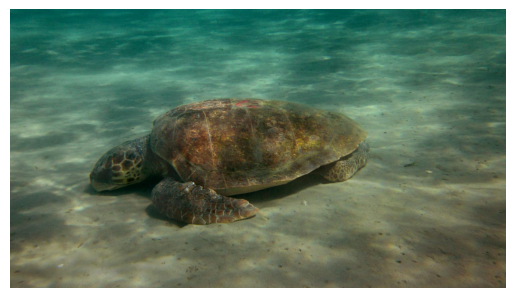

In [14]:
I = io.imread(im['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [15]:
img_dir = 'images/'
image_id = 7
img = coco.imgs[image_id]
img

{'id': 7,
 'width': 2000,
 'height': 1333,
 'file_name': 'images/t001/OiaMESWPyh.JPG',
 'license': 0,
 'flickr_url': '',
 'coco_url': '',
 'date_captured': 0,
 'timestamp': '2014:07:14 14:52:17',
 'identity': 't001'}

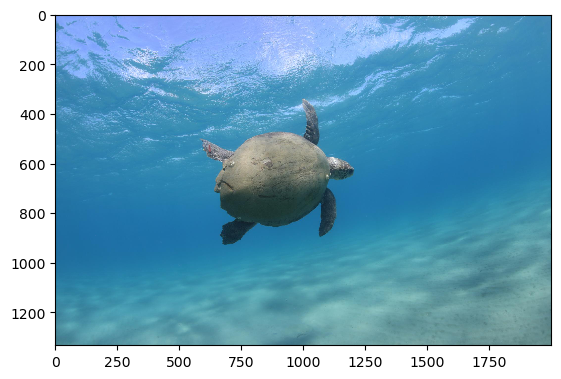

In [16]:
# Let's display the image
image = np.array(Image.open(img['file_name']))
plt.imshow(image, interpolation='nearest')
plt.show()

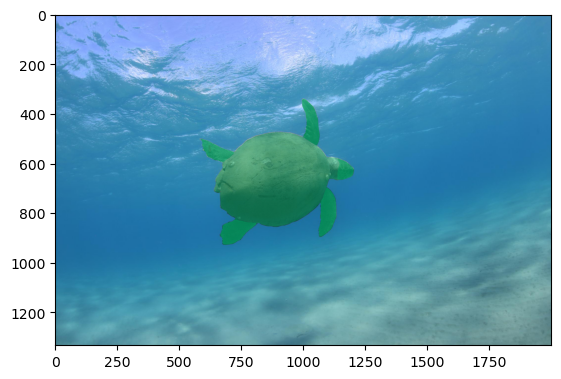

In [17]:
# Let's overlay annotations
plt.imshow(image)
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
coco.showAnns(anns)

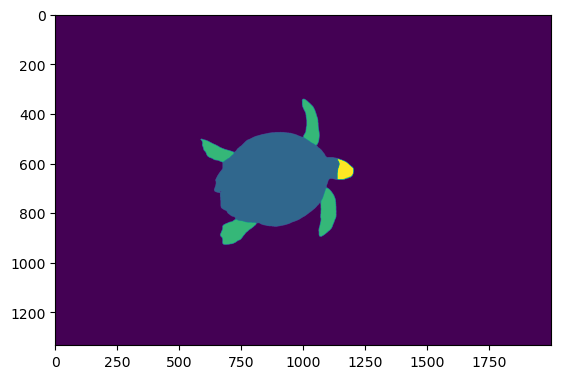

In [18]:
mask = coco.annToMask(anns[0])
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])
plt.imshow(mask)

In [19]:
image_id = 2
img = coco.imgs[image_id]
img

{'id': 2,
 'width': 2000,
 'height': 1333,
 'file_name': 'images/t001/EKyrFKHQzh.JPG',
 'license': 0,
 'flickr_url': '',
 'coco_url': '',
 'date_captured': 0,
 'timestamp': '2014:07:14 14:48:49',
 'identity': 't001'}

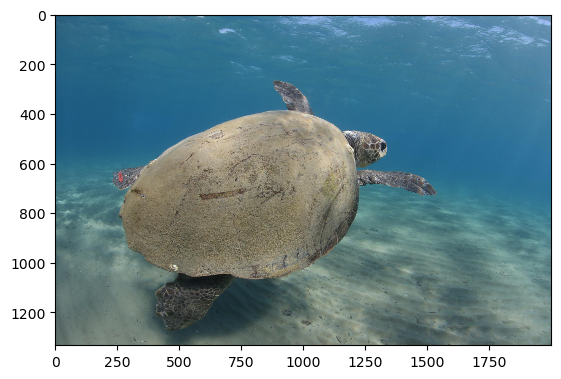

In [20]:
# Let's display the image
image = np.array(Image.open(img['file_name']))
plt.imshow(image, interpolation='nearest')
plt.show()

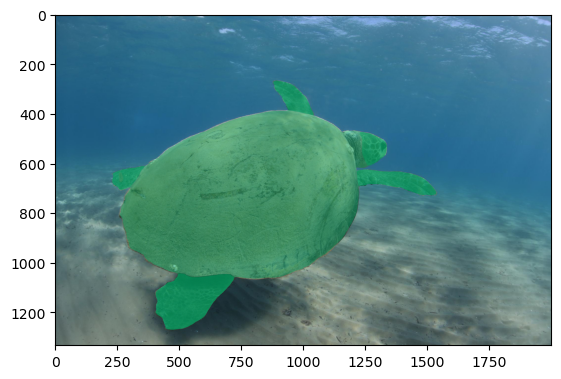

In [21]:
# Let's overlay annotations
plt.imshow(image)
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
coco.showAnns(anns)

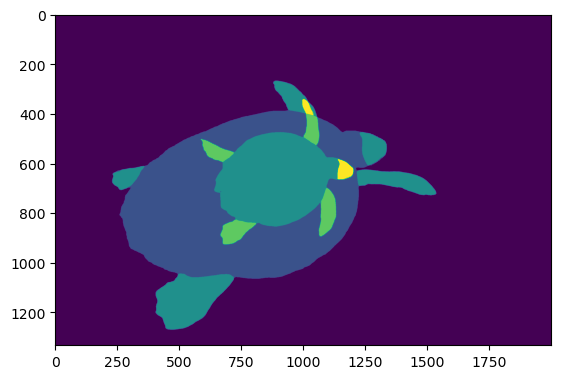

In [22]:
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])
plt.imshow(mask)


In [23]:
for image_id in range(1,len(data['images'])):
    try:
        print(image_id)
        img = coco.imgs[image_id]
        image = np.array(Image.open(img['file_name']))
        cat_ids = coco.getCatIds()
        anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
        anns = coco.loadAnns(anns_ids)
        #coco.showAnns(anns)
        mask = coco.annToMask(anns[0])
        for i in range(len(anns)):
            mask += coco.annToMask(anns[i])
        np.save(f"./images_label_id/{image_id}_mask.npy", mask)  # 保存为 .npy 文件
    except:
        continue

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [35]:
for image_id in range(1,8730):
    try:
        print(image_id)
        img = coco.imgs[image_id]
        image = np.array(Image.open(img['file_name']))
        cat_ids = coco.getCatIds()
        anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
        anns = coco.loadAnns(anns_ids)
        #coco.showAnns(anns)
        mask = coco.annToMask(anns[0])
        for i in range(len(anns)):
            mask += coco.annToMask(anns[i])
        original_file_path = img['file_name']  
        new_file_path = original_file_path.replace('images/', 'images_label_npv/').replace('.JPG', '').replace('.jpg', '').replace('.jpeg', '')
        print(new_file_path)
        os.makedirs(os.path.dirname(new_file_path), exist_ok=True)
        # mask_image = Image.fromarray(np.stack([mask] * 3, axis= -1), 'RGB')  
        # mask_image.save(new_file_path,format='PNG')
        np.save(new_file_path, mask)  # 保存为 .npy 文件
    except:
        continue

1
images_label_npv/t001/CAluWEgwPX
2
images_label_npv/t001/EKyrFKHQzh
3
images_label_npv/t001/ELAvEqeXxT
4
images_label_npv/t001/IxRLFwTGCv
5
images_label_npv/t001/LKCJAhfLBJ
6
images_label_npv/t001/LZystXlIqe
7
images_label_npv/t001/OiaMESWPyh
8
images_label_npv/t001/VMyJozldvy
9
images_label_npv/t001/XhbkFIOvZr
10
images_label_npv/t001/ZKnMahXQgJ
11
images_label_npv/t001/ZkWKNtWbVK
12
images_label_npv/t001/anuJvqUqBB
13
images_label_npv/t001/dLFculJDGP
14
images_label_npv/t001/iiWUAXGTRk
15
images_label_npv/t001/kTIpheVAuj
16
images_label_npv/t001/oYBbBMeIrc
17
images_label_npv/t001/rArWeMiEhi
18
images_label_npv/t001/tIpzeVcJbR
19
images_label_npv/t001/txgBopXzbZ
20
images_label_npv/t001/uUVqsYByEj
21
images_label_npv/t001/xldQLnWiRI
22
images_label_npv/t001/zgOfklUqJC
23
images_label_npv/t002/AWKZYHmepZ
24
images_label_npv/t002/AyPUCFEHdl
25
images_label_npv/t002/DrqbIVqYxx
26
images_label_npv/t002/EjSeeiwrpz
27
images_label_npv/t002/PnzurZBZbL
28
images_label_npv/t002/SuPxFCvAob
2

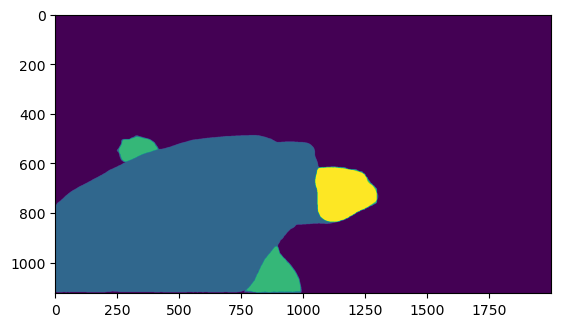

In [76]:
a=np.load('./images_label_npv/t001/anuJvqUqBB.npy')
plt.imshow(a)

In [74]:
for image_id in range(1,8730):
    try:
        img_info = coco.loadImgs(image_id)[0] 
        file_name = img_info['file_name']
        turtle_mask = coco.getAnnIds(imgIds=image_id, catIds=1, iscrowd=None)        # entire of the turtle
        leg_mask = coco.getAnnIds(imgIds=image_id, catIds=2, iscrowd=None)        # legs of the turtle
        head_mask = coco.getAnnIds(imgIds=image_id, catIds=3, iscrowd=None)        # Head of the turtle
        turtle_mask = coco.loadAnns(turtle_mask)
        leg_mask = coco.loadAnns(leg_mask)
        head_mask = coco.loadAnns(head_mask)
        mask1 = coco.annToMask(turtle_mask[0])
        for i in range(1, len(turtle_mask)):
            mask1 += coco.annToMask(turtle_mask[i])
        mask2 = np.zeros_like(mask1)
        for i in range(len(leg_mask)):
            mask2 += coco.annToMask(leg_mask[i])
        mask3 = np.zeros_like(mask2)
        for i in range(len(head_mask)):
            mask3 += coco.annToMask(head_mask[i])
        mask3[mask3 > 0] = 2
        mask2[mask2 > 0] = 1
        mask1[mask1 > 0] = 1
        mask = mask1 + mask2 
        mask[mask > 1] = 2
        mask = mask + mask3
        mask[mask > 2] = 3
        mask = mask * 85 
        original_file_path = file_name 
        new_file_path = original_file_path.replace('images/', 'images_label_pictures/').replace('.JPG', '.PNG').replace('.jpg', '.PNG').replace('.jpeg', '.PNG')
        print(new_file_path)
        os.makedirs(os.path.dirname(new_file_path), exist_ok=True)
        mask_image = Image.fromarray(mask.astype(np.uint8))  
        mask_image.save(new_file_path,format='PNG')
    except:
        continue

images_label_pictures/t001/CAluWEgwPX.PNG
images_label_pictures/t001/EKyrFKHQzh.PNG
images_label_pictures/t001/ELAvEqeXxT.PNG
images_label_pictures/t001/IxRLFwTGCv.PNG
images_label_pictures/t001/LKCJAhfLBJ.PNG
images_label_pictures/t001/LZystXlIqe.PNG
images_label_pictures/t001/OiaMESWPyh.PNG
images_label_pictures/t001/VMyJozldvy.PNG
images_label_pictures/t001/XhbkFIOvZr.PNG
images_label_pictures/t001/ZKnMahXQgJ.PNG
images_label_pictures/t001/ZkWKNtWbVK.PNG
images_label_pictures/t001/anuJvqUqBB.PNG
images_label_pictures/t001/dLFculJDGP.PNG
images_label_pictures/t001/iiWUAXGTRk.PNG
images_label_pictures/t001/kTIpheVAuj.PNG
images_label_pictures/t001/oYBbBMeIrc.PNG
images_label_pictures/t001/rArWeMiEhi.PNG
images_label_pictures/t001/tIpzeVcJbR.PNG
images_label_pictures/t001/txgBopXzbZ.PNG
images_label_pictures/t001/uUVqsYByEj.PNG
images_label_pictures/t001/xldQLnWiRI.PNG
images_label_pictures/t001/zgOfklUqJC.PNG
images_label_pictures/t002/AWKZYHmepZ.PNG
images_label_pictures/t002/AyPUCFE

In [77]:
img_info = coco.loadImgs(1)[0] 
file_name = img_info['file_name']
turtle_mask = coco.getAnnIds(imgIds=1, catIds=1, iscrowd=None)        # entire of the turtle
leg_mask = coco.getAnnIds(imgIds=1, catIds=2, iscrowd=None)        # legs of the turtle
head_mask = coco.getAnnIds(imgIds=1, catIds=3, iscrowd=None)        # Head of the turtle
turtle_mask = coco.loadAnns(turtle_mask)
leg_mask = coco.loadAnns(leg_mask)
head_mask = coco.loadAnns(head_mask)
mask1 = coco.annToMask(turtle_mask[0])
for i in range(1, len(turtle_mask)):
    mask1 += coco.annToMask(turtle_mask[i])
mask2 = np.zeros_like(mask1)
for i in range(len(leg_mask)):
    mask2 += coco.annToMask(leg_mask[i])
mask3 = np.zeros_like(mask2)
for i in range(len(head_mask)):
    mask3 += coco.annToMask(head_mask[i])
mask3[mask3 > 0] = 2
mask2[mask2 > 0] = 1
mask1[mask1 > 0] = 1
mask = mask1 + mask2 
mask[mask > 1] = 2
mask = mask + mask3
mask[mask > 2] = 3
mask = mask * 85 
unique_values, counts = np.unique(mask, return_counts=True)
print("Unique values in mask and their counts:", dict(zip(unique_values, counts)))
original_file_path = file_name 
new_file_path = original_file_path.replace('images/', 'images_label_pictures/').replace('.JPG', '.PNG').replace('.jpg', '.PNG').replace('.jpeg', '.PNG')
print(new_file_path)
os.makedirs(os.path.dirname(new_file_path), exist_ok=True)
mask_image = Image.fromarray(mask.astype(np.uint8))  
mask_image.save(new_file_path,format='PNG')

Unique values in mask and their counts: {0: 2546916, 85: 92216, 170: 22975, 255: 3893}
images_label_pictures/t001/CAluWEgwPX.PNG
